In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


1.	Sign in to Google Account (GMail)
2.	Create a folder “Dataset” in Google Drive
3.	Go to Kaggle’s website to get dataset
4.	Download dataset in your computer
5.	Unzip (extract) .JSON file
6.	Upload it into Google Drive’s “Dataset” folder
7.	Open Google Colab
8.	Click “New Notebook”
9.	Go to Edit->Notebook settings and set Hardware accelerator drop-down menu to GPU
10.	Mount your Google Drive on Google Colab
11.	Start writing the code
12.	Navigate through the file tree on the left to locate the dataset (.JSON) file in the “Dataset” folder
13.	Hover the mouse pointer over the dataset file and click on the three dotted icon and then select “Copy path”
14.	Paste file path into code, in pd.read_jason()
15.	Write the rest of the code

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
import matplotlib.pyplot as plt

In [8]:
df = pd.read_json("/content/gdrive/MyDrive/Dataset/Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


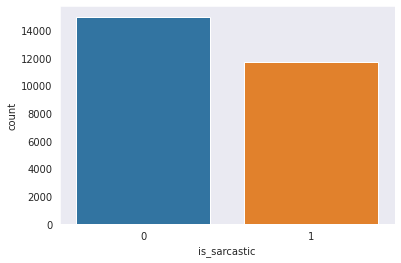

In [9]:
# plot the class labels distribution
sns.set_style("dark")
sns.countplot(df.is_sarcastic)

In [10]:
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [11]:
len(df.is_sarcastic)

26709

In [12]:
X = df.iloc[:, 1]
Y = df.iloc[:, 2]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
len(X_test)

5342

In [14]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequence_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
sequence_matrix.shape

(21367, 150)

In [15]:
np.amax(sequence_matrix)

999

In [16]:
def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [17]:
# compile the model
model = RNN()
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(sequence_matrix, Y_train, batch_size=100, epochs=5, validation_split=0.1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

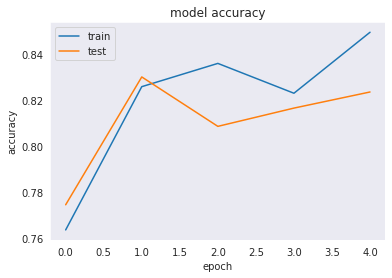

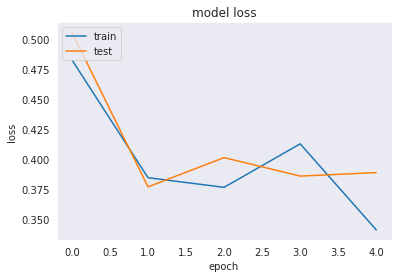

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()